In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import os

In [3]:
repo = 'C:/Users/Philo/Documents/reco-gym/data/'

In [4]:
os.chdir(repo)

In [2]:
pleave = 0.01
ctr = 0.01
def gamma(ctr,pleave=0.01,ptobandit=0.25):
    return (ctr*((1-pleave)**(1/(pleave+ptobandit))))+((1-ctr)*(1-pleave))

def ratio(ctr):
    return (1-ctr)/(1-(gamma(ctr)*ctr))

In [4]:
print(gamma(0.01))
print(gamma(0.001))
print(gamma(0.0005))
print(gamma(0.03))

0.9897208243771446
0.9899720824377144
0.9899860412188574
0.9891624731314338


In [3]:
ratio(0.01)
ratio(0.02)

0.9997845698641089

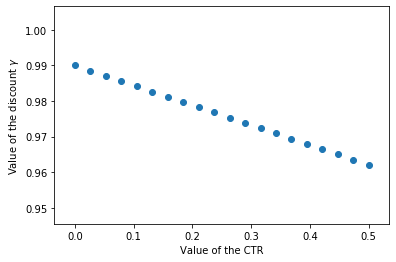

In [7]:
plt.scatter(np.linspace(0.0001,0.5,20),[gamma(p) for p in np.linspace(0.0001,0.999,20)])
plt.xlabel('Value of the CTR')
plt.ylabel('Value of the discount $\gamma$')
plt.show()

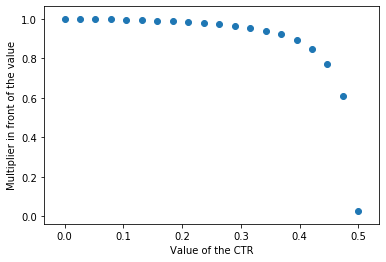

In [8]:
plt.scatter(np.linspace(0.0001,0.5,20),[(1-p)/(1-(gamma(p)*p)) for p in np.linspace(0.0001,0.999,20)])
plt.xlabel('Value of the CTR')
plt.ylabel('Multiplier in front of the value')
plt.show()

In [5]:
data = pkl.load(open("C:/Users/Philo/Documents/reco-gym/data/data5000rand10.pkl",'rb'))

In [6]:
print(sum(data['z']=="sale"))
print(sum(data['c']==1))

9267
4578


In [12]:
# indices where there is only one sale, that happens just after the reco
indices_one = list(data[data['r']==1][data.shift(-2)["z"]=='sale'][data.shift(-2)["u"]==data["u"]].index)

# indices where there is a click, and at least one sale just after the reco
indices_pos = list(data[data['c']==1][data.shift(-2)["z"]=='sale'][data.shift(-2)["u"]==data["u"]].index)

C:\Users\Philo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Philo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Philo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Philo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [13]:
# Share of recos with 1 sale that happen just after divided by share of reco with at least one sale that happend just after
len(indices_one)/len(indices_pos)

0.75625

In [14]:
# Among the recos that are attributed a reward of 1, share of those that happen just after the reco
len(indices_one)/sum(data['r']==1)

0.37422680412371134

In [15]:
# Among the recos with at least one attributed sales, share of those that have an immediate sale after the reco
len(indices_pos)/sum(data['r']>0)

0.3812549642573471

In [92]:
# # derive the weight distribution used

# list_all_weights = []
# for i in data['u'].unique():
#     list_weights = []
#     index_init = data[data["u"]==i].index[0]
#     bandit_indices = data[data["z"]=='bandit'][data["u"]==i].index
#     bandit_indices
#     for ind in bandit_indices:
#         d_ = data.iloc[index_init:ind]
#         list_weights.append(sum(d_["z"]=='organic'))
#     list_all_weights.append(list_weights)

# pkl.dump(list_all_weights,open('C:/Users/Philo/Documents/reco-gym/data/list_all_weights.pkl','wb'))

In [21]:
list_all_weights = pkl.load(open(repo + 'list_all_weights.pkl','rb'))

In [39]:
# avg_ = []
# min_ = []
# max_ = []
# median_ = []

# for u in range(5000):
#     avg_.append(np.mean(list_all_weights[u]))
#     min_.append(np.min(list_all_weights[u]))
#     max_.append(np.max(list_all_weights[u]))
#     median_.append(np.median(list_all_weights[u]))
    

In [27]:
all_ = [l for li in list_all_weights for l in li ]

In [47]:
# all_weights = [l/np.sum(li) for li in list_all_weights for l in li ]
all_weights = np.array(all_weights)

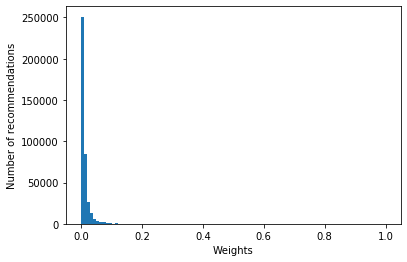

In [44]:
plt.hist(np.array(all_weights),bins=100)
# plt.title('Weights distribution given 5,000 users')
plt.ylabel('Number of recommendations')
plt.xlabel('Weights')
plt.show()

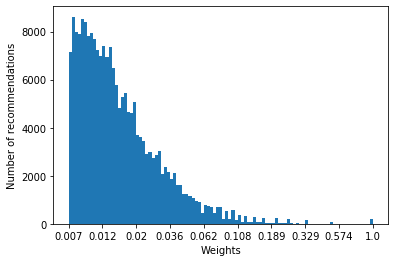

In [78]:
# plt.title('Weights distribution given 5,000 users')
plt.ylabel('Number of recommendations')
plt.xlabel('Weights')

plt.hist(np.log(all_weights),bins =  np.linspace(np.log10(1e-5), np.log10(1), 100))
plt.xticks(np.linspace(np.log10(1e-5), np.log10(1), 10),np.round(np.exp(np.linspace(np.log10(1e-5), np.log10(1), 10)),3))
plt.show()

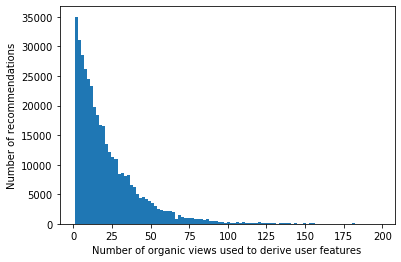

In [43]:
plt.hist(np.array(all_),bins=100)
# plt.title('Weights distribution given 5,000 users')
plt.ylabel('Number of recommendations')
plt.xlabel('Number of organic views used to derive user features')
plt.show()

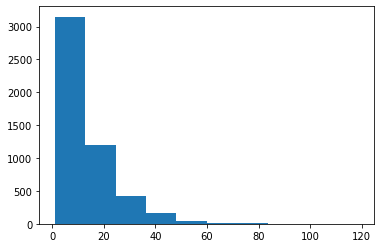

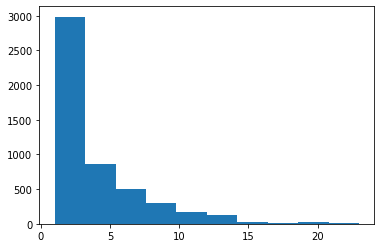

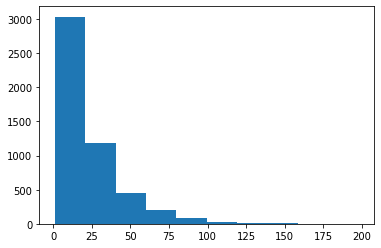

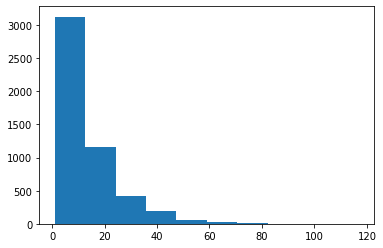

In [25]:
plt.hist(avg_)
plt.show()
plt.hist(min_)
plt.show()
plt.hist(max_)
plt.show()
plt.hist(median_)
plt.show()

In [3]:
# from recogym.agents import sale_agent
agents = pkl.load(open(repo+'agents5000rand10kappa0.5v_sharekron.pkl','rb'))
# agents = pkl.load(open(repo+'timeagents5000rand10v_sharetimekronlinweights.pkl','rb'))


In [5]:
ag = agents[1]['likelihood_logreg_clickkron']

In [11]:
## look at the recos after the A/B tests:

# # time, click, no discount + weights !!
# res = pkl.load(open(repo+'res_rand10kappa0.55000_5000_v_sharekrontimeweights10nb2likelihood_saleclickprodtimekronlin.pkl','rb'))

# # time, click, discount + weights !!
# res = pkl.load(open(repo+'res_rand10kappa0.55000_5000_v_sharekrontimeweights10nb1likelihood_saleclickprod_discounttimekronlin.pkl','rb'))

# # no time, no weights + discount
# res = pkl.load(open(repo+'res_rand10kappa0.55000_5000_v_sharekron10nb0likelihood_saleclickprod_discountkron.pkl','rb'))

# click agent simply
res = pkl.load(open(repo+'res_rand10kappa0.55000_5000_v_sharekron10nb1likelihood_logreg_clickkron.pkl','rb'))



In [12]:
r = res['all_data'][res['all_data']['a']>=0].groupby('u').agg(['unique'])
data = res['all_data']

In [13]:
nb_recos_per_user = [len(list(r['a']['unique'])[i]) for i in range(5000)]

In [14]:
print(np.unique(nb_recos_per_user))

[1 2 3 4 5]


(array([3672., 1040.,  261.,   27.]),
 array([1., 2., 3., 4., 5.]),
 <a list of 4 Patch objects>)

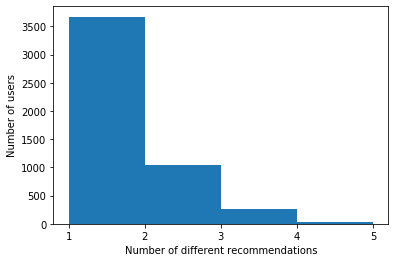

In [15]:
plt.xticks(range(0,6))
plt.ylabel('Number of users')
plt.xlabel('Number of different recommendations')
plt.hist(nb_recos_per_user, bins = 4)

# plt.show()

In [16]:
r.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', name='u', length=5000)

In [17]:
ind = 0
nb_recos = 5
d = data[data['u']==np.where(np.array(nb_recos_per_user)==nb_recos)[0][ind]]
# list(d[d["a"]>=0]['a'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(d)

,t,u,z,v,a,c,r,ps,ps-a,sale
273058,0.0,2599,organic,3,<NA>,NaN,NaN,NaN,None,0
273059,1.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273060,2.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273061,3.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273062,4.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273063,5.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273064,6.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273065,7.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273066,8.0,2599,bandit,<NA>,3,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
273067,9.0,2599,organic,9,<NA>,NaN,NaN,NaN,None,0


In [33]:
def act(self, observation, reward, done):
        """Act method returns an action based on current observation and past history"""
        logged_observation = self.observation_to_log(observation)
        self.feature_provider.observe(logged_observation)      
        user_state = self.feature_provider.features()
        if (self.epsilon_greedy == True) & (np.random.rand() < self.epsilon) : 
            print("Explore")
            action = np.random.randint(self.num_products())
        # elif self.softmax :
        #     score = self._score_products(user_state)
        #     action = self.random_state.choice(
        #             self.config.num_products,
        #             p=score/np.sum(score)
        #         )
        else :
            action = np.argmax(self._score_products(user_state))
        
        ps = 1.0
        # all_ps = np.zeros(self.num_products)
        # all_ps[action] = 1.0        
        all_ps = self._score_products(user_state)
        
        if done :
            self.reset()
        
        return {
            **super().act(observation, reward, done),
            **{
                'a': action,
                'ps': ps,
                'ps-a': all_ps,
            }
        }
ag.act = act

In [ ]:
ag.act()

[0.02354895 0.01012312 0.02886231 0.03065677 0.01014514 0.01840595
 0.00910842 0.01272432 0.01078693 0.00697191]
3


[0.0227649  0.00877734 0.02299636 0.01674738 0.01150297 0.01734206
 0.00826115 0.00897164 0.0126639  0.0093026 ]
2
[0.01781853 0.00727216 0.01583977 0.01031631 0.01315849 0.01745796
 0.0094101  0.00982268 0.01693149 0.01000133]
0
[0.01674517 0.0069029  0.01518714 0.00917921 0.01270789 0.01703277
 0.00924332 0.00966754 0.01642198 0.01078967]
5


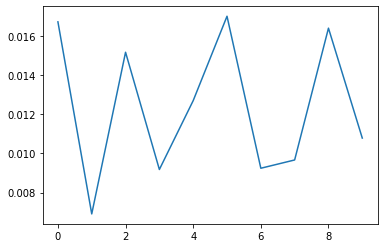

In [29]:
l=[0,0,0,1,0,0,0,0,0,0]
print(ag._score_products(np.array(l)))
print(np.argmax(ag._score_products(np.array(l))))
print('\n')
l=[0,0,0,.5,0,0,0,0,0,.5]
print(ag._score_products(np.array(l)))
print(np.argmax(ag._score_products(np.array(l))))
l=[0,0,1/6,1/6,2/6,1/6,0,0,0,1/6]
print(ag._score_products(np.array(l)))
print(np.argmax(ag._score_products(np.array(l))))
# plt.plot(ag._score_products(np.array(l)))

l=[0,0,1/9,1/9,3/9,2/9,0,0,0,2/9]
print(ag._score_products(np.array(l)))
print(np.argmax(ag._score_products(np.array(l))))
plt.plot(ag._score_products(np.array(l)))